
LINK TO DATASET: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

LINK TO ATTRIBUTE INFO: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# train, test, split
from sklearn.model_selection import train_test_split

# encoders
from sklearn.impute import SimpleImputer

#pipeline
from sklearn.pipeline import make_pipeline

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# bagged model
from sklearn.ensemble import RandomForestClassifier

# boosted Models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
!pip uninstall xgboost 
!pip install xgboost==0.90

# permutation Importance
from sklearn.inspection import permutation_importance 

# score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.9/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl (142.8 MB)


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2

# category encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

Found existing installation: scikit-learn 1.2.0
Uninstalling scikit-learn-1.2.0:
  Successfully uninstalled scikit-learn-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.5 MB)


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 34.7 MB/s eta 0:00:00


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import shap

In [ ]:
from google.colab import files
df = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  # null values, datetime, index, outliers = not applicable

  # HCC = not applicable

  # format column names
  df.columns = ['gender', 'age', 'height', 'weight', 'fam_hist_overweight', 'high_cal_freq', 'veg_with_meals', 'main_meals_daily', 'eat_between_meals', 
             'smoker', 'water_amount_daily', 'monitor_calories', 'phys_activity_frequency', 'daily_tech_usage', 'alcohol_usage', 'transportation', 'health_assessment']
  
  # encode binary columns (yes = 1, no = 0)
  binary_cols = ['fam_hist_overweight', 'high_cal_freq', 'smoker', 'monitor_calories']
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

  # fix veg_with_meals
  df['veg_with_meals'] = df['veg_with_meals'].map(lambda veg:
    'always' if veg == 3.0 else
    'sometimes' if 1.7 <= veg <= 2.9 else
    'never'
  )                         
  
  # fix main_meals_daily
  df['main_meals_daily'] = df['main_meals_daily'].map(lambda meal:
    'three or more' if meal >= 3.0 else
    'between 2 and 3' if 2.0 <= meal <= 2.9 else
    'between 1 and 2' if 1.0 <= meal <= 1.9 else
    'nothing much'
    )
  # water_amount_daily
  df['water_amount_daily'] = df['water_amount_daily'].map(lambda water:
     'more than 2L' if water == 3.0 else
     'between 1L and 2L' if 1.0 <= water <=2.9 else
     'less than 1L'
     )
  
  # phys_activity_frequency
  df['phys_activity_frequency'] = df['phys_activity_frequency'].map(lambda phys:
    '4-5 days per week' if phys == 3.0 else
    '2-4 days per week' if 2.0 <= phys <=2.9 else
    '1-2 days per week' if 1.0 <= phys <= 1.9 else
    'rarely, if ever'
    )
  
  # data_tech_usage
  df['daily_tech_usage'] = df['daily_tech_usage'].map(lambda tech:
    'more than 5 hrs' if tech == 2.0 else
    'between 3-5 hrs' if 1.0 <= tech <= 1.9 else
    'between 0-2 hrs'
    
    ) 
  
  return df

df = wrangle(filepath='ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.head()

,gender,age,height,weight,fam_hist_overweight,high_cal_freq,veg_with_meals,main_meals_daily,eat_between_meals,smoker,water_amount_daily,monitor_calories,phys_activity_frequency,daily_tech_usage,alcohol_usage,transportation,health_assessment
0,Female,21.0,1.62,64.0,1,0,sometimes,three or more,Sometimes,0,between 1L and 2L,0,"rarely, if ever",between 3-5 hrs,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,always,three or more,Sometimes,1,more than 2L,1,4-5 days per week,between 0-2 hrs,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,sometimes,three or more,Sometimes,0,between 1L and 2L,0,2-4 days per week,between 3-5 hrs,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,always,three or more,Sometimes,0,between 1L and 2L,0,2-4 days per week,between 0-2 hrs,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,sometimes,between 1 and 2,Sometimes,0,between 1L and 2L,0,"rarely, if ever",between 0-2 hrs,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
target = 'health_assessment'
y = df[target]
X = df.drop(columns=target)

X.shape, y.shape

((2111, 16), (2111,))

In [ ]:
# split the data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# establish BASELINE
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.1617298578199052


In [ ]:
# RANDOM FOREST
model_rf = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

model_rf.fit(X_train, y_train);

In [ ]:
# GRADIENT BOOSTED
model_gb = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
    GradientBoostingClassifier(random_state=42)
)

model_gb.fit(X_train, y_train);

In [ ]:
# XGB BOOSTED
model_xgb = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
    XGBClassifier(random_state=42, n_jobs=-1)
)

model_xgb.fit(X_train, y_train);

In [ ]:
# RF: check training and test accuracy for all three models

print('RF Training Accuracy', model_rf.score(X_train, y_train))
print('RF Test Accuracy', model_rf.score(X_val, y_val))
print()
print('GB Training Accuracy', model_gb.score(X_train, y_train))
print('GB Validation Accuracy', model_gb.score(X_val, y_val))
print()
print('XGB Training Accuracy', model_xgb.score(X_train, y_train))
print('XGB Validation Accuracy', model_xgb.score(X_val, y_val))

RF Training Accuracy 1.0
RF Test Accuracy 0.32387706855791965

GB Training Accuracy 0.9994075829383886
GB Validation Accuracy 0.3640661938534279

XGB Training Accuracy 0.9946682464454977
XGB Validation Accuracy 0.35224586288416077


Text(0, 0.5, 'Feature')

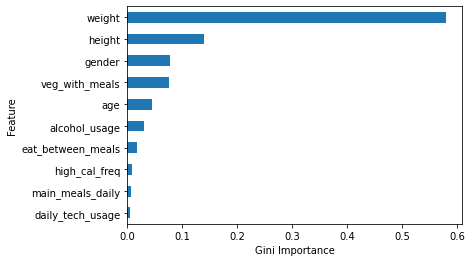

In [ ]:
# plot the importances
importances = model_gb.named_steps['gradientboostingclassifier'].feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(data=importances, index=feature_names).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')